# **Music Information Retreival**

In [4]:
import IPython.display as ipd

In [5]:
import numpy, scipy, matplotlib.pyplot as plt
import librosa, librosa.display
#import stanford_mir; stanford_mir.init()

## Sheet Music Representation

Music can be represented in many different ways. The printed, visual form of a musical work is called a score or sheet music. For example, here is a sheet music excerpt from Mozart Piano Sonata No. 11 K. 331:

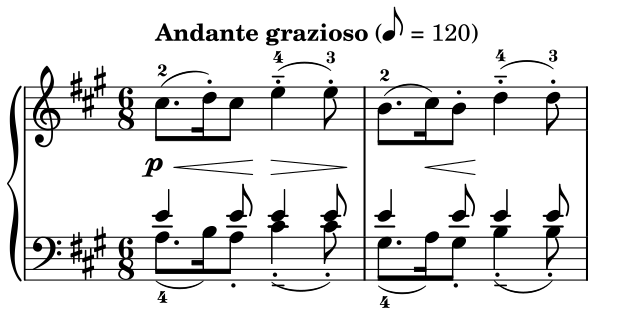

In [6]:
ipd.SVG("https://upload.wikimedia.org/wikipedia/commons/2/27/MozartExcerptK331.svg")

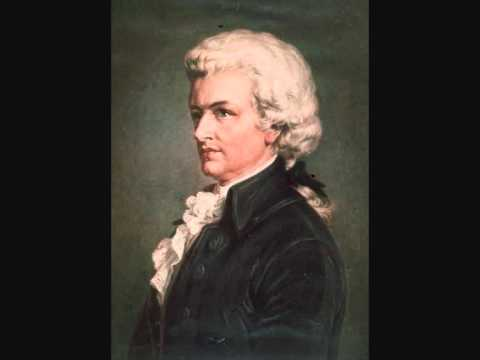

In [7]:
ipd.YouTubeVideo('dP9KWQ8hAYk') 

Sheet music consists of notes. A note has several properties including pitch, timbre, loudness, and duration.

**Pitch** ([Wikipedia](https://en.wikipedia.org/wiki/Pitch_(music)) is a perceptual property that indicates how "high" or "low" a note sounds. Pitch is closely related to the fundamental frequency sounded by the note, although fundamental frequency is a physical property of the sound wave.

An **octave** ([Wikipedia](https://en.wikipedia.org/wiki/Octave)) is an interval between two notes where the higher note is twice the fundamental frequency of the lower note. For example, an A at 440 Hz and an A at 880 Hz are separated by one octave. Here are two Cs separated by one octave:

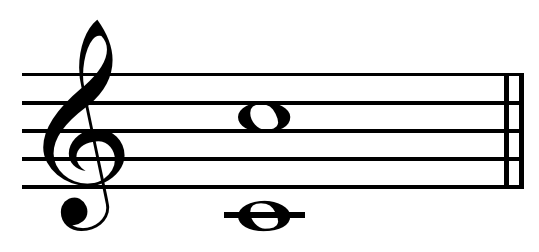

In [8]:
ipd.Image("https://upload.wikimedia.org/wikipedia/commons/a/a5/Perfect_octave_on_C.png")

A **pitch class** ([Wikipedia](https://en.wikipedia.org/wiki/Pitch_class)) is the set of all notes that are an integer number of octaves apart. For example, the set of all Cs, {..., C1, C2, ...} is one pitch class, and the set of all Ds, {..., D1, D2, ...} is another pitch class. Here is the pitch class for C:

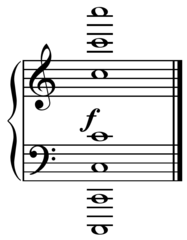

In [9]:
ipd.Image("https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Pitch_class_on_C.png/187px-Pitch_class_on_C.png")

**Equal temperament** ([Wikipedia](https://en.wikipedia.org/wiki/Equal_temperament)) refers to the standard practice of dividing the octave into 12 uniform scale steps.

The difference between two subsequent scale steps is called a **semitone** ([Wikipedia](https://en.wikipedia.org/wiki/Semitone)), the smallest possible interval in the 12-tone equal tempered scale. Musicians may know this as a "half step."

The **key signature** ([Wikipedia](https://en.wikipedia.org/wiki/Key_signature)) follows the clef on a staff and indicates the key of the piece by the sharps or flats which are present throughout the piece. In the Mozart sonata excerpt above, the key signature is A major.

The **time signature** ([Wikipedia](https://en.wikipedia.org/wiki/Time_signature)) follows the key signature on the staff and indicates the rhythmic structure, or meter, of the piece. In the Mozart sonata excerpt above, the time signature is 6/8, i.e. six eighth notes in one measure.

**Tempo** ([Wikipedia](https://en.wikipedia.org/wiki/Tempo)) denotes how slow or fast a piece is played as measured by beats per minute (BPM). In the Mozart sonata excerpt above, the tempo marking is "Andante grazioso".

## Audio Representation


In performance, musicians convert sheet music representations into **sound** which is transmitted through the air as air pressure oscillations. In essence, sound is simply air vibrating ([Wikipedia](https://en.wikipedia.org/wiki/Sound)).  Sound vibrates through the air as **longitudinal waves**, i.e. the oscillations are parallel to the direction of propagation.

**Audio** refers to the production, transmission, or reception of sounds that are audible by humans. An **audio signal** is a representation of sound that represents the fluctuation in air pressure caused by the vibration as a function of time. Unlike sheet music or symbolic representations, audio representations encode everything that is necessary to reproduce an acoustic realization of a piece of music. However, note parameters such as onsets, durations, and pitches are not encoded explicitly. This makes converting from an audio representation to a
symbolic representation a difficult and ill-defined task.

### Waveforms and the Time Domain

The basic representation of an audio signal is in the **time domain**. 

Let's listen to a file:

In [10]:
x, sr = librosa.load('Audio/flute-C6.wav')
ipd.Audio(x, rate=sr)

The change in air pressure at a certain time is graphically represented by a **pressure-time plot**, or simply **waveform**.

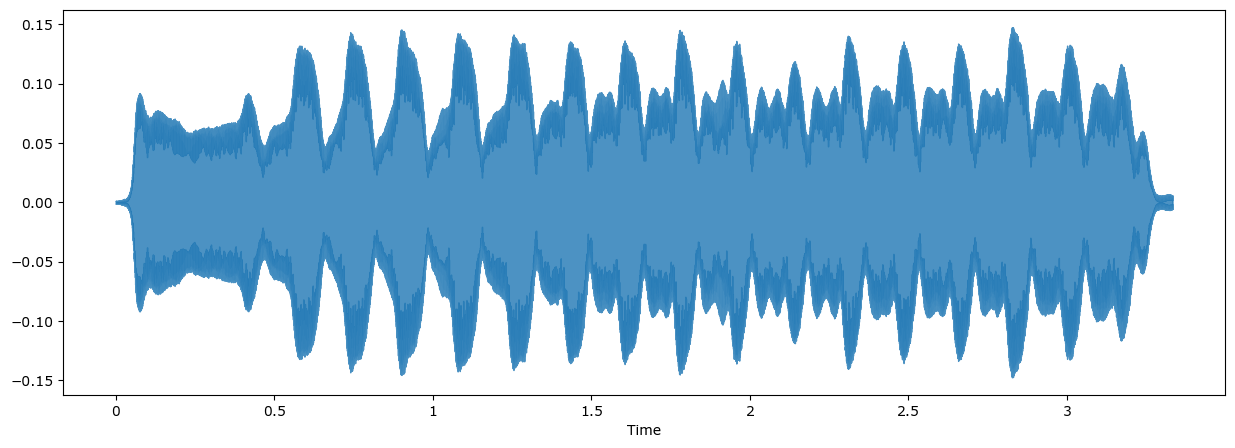

In [24]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x, alpha=0.8)


Digital computers can only capture this data at discrete moments in time. The rate at which a computer captures audio data is called the **sampling frequency** (often abbreviated `fs`) or **sampling rate** (often abbreviated `sr`). For this workshop, we will mostly work with a sampling frequency of 44100 Hz, the sampling rate of CD recordings.



### Timbre: Temporal Indicators

**Timbre** is the quality of sound that distinguishes the tone of different instruments and voices even if the sounds have the same pitch and loudness.

One characteristic of timbre is its temporal evolution. The **envelope** of a signal is a smooth curve that approximates the amplitude extremes of a waveform over time.

Envelopes are often modeled by the **ADSR model** ([Wikipedia](https://en.wikipedia.org/wiki/Synthesizer#Attack_Decay_Sustain_Release_.28ADSR.29_envelope)) which describes four phases of a sound: attack, decay, sustain, release. 

During the attack phase, the sound builds up, usually with noise-like components over a broad frequency range. Such a noise-like short-duration sound at the start of a sound is often called a transient.

During the decay phase, the sound stabilizes and reaches a steady periodic pattern.

During the sustain phase, the energy remains fairly constant.

During the release phase, the sound fades away.

The ADSR model is a simplification and does not necessarily model the amplitude envelopes of all sounds.

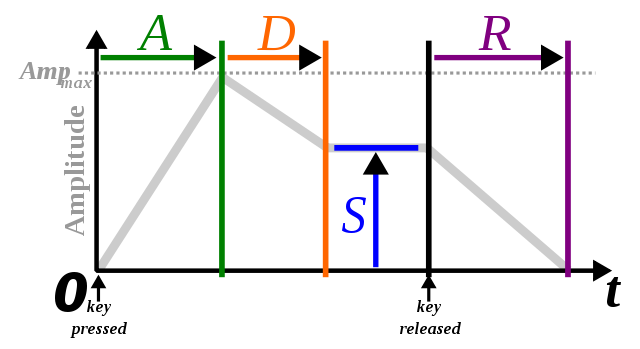

In [25]:
ipd.Image("https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/ADSR_parameter.svg/640px-ADSR_parameter.svg.png")

### Timbre: Spectral Indicators

Another property used to characterize timbre is the existence of partials and their relative strengths. **Partials** are the dominant frequencies in a musical tone with the lowest partial being the **fundamental frequency**.

The partials of a sound are visualized with a **spectrogram**. A spectrogram shows the intensity of frequency components over time. (See [Fourier Transform](fourier_transform.html) and [Short-Time Fourier Transform](stft.html) for more.)

### Pure Tone

Let's synthesize a pure tone at 1047 Hz, concert C6:

In [26]:
T = 2.0 # seconds
f0 = 1047.0
sr = 22050
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.1*numpy.sin(2*numpy.pi*f0*t)
ipd.Audio(x, rate=sr)

Display the spectrum of the pure tone:

In [39]:
X = scipy.fft(x[10000:14096])
X_mag = numpy.absolute(X)
plt.figure(figsize=(14, 5))
print(f[:1047].shape)
print (X_mag[:1047].shape)
plt.plot(f[:1047], X_mag[:1047]) #magnitude spectrum
plt.xlabel('Frequency (Hz)')

TypeError: 'module' object is not callable